# Turbofan Engine Predictive Maintanence


# İçindekiler

1.   Veri setinin tanımı
2.   Verilerin yüklenmesi
      *   pandas kütüphanesi ile verilerin dataframe'e yüklenmesi.
      *   Dataframe'de yer alan özellik bilgilerinin gösterilmesi.
3.   Veri temizleme işlemleri
      *   Boş hücrelerin temizlenmesi
      *   Boş hücrelerin mean ile doldurulması
4.   İstatistiksel veri analizi
      * Veri seti hakkında istatistiksel bilgiler
      * Korelasyon Tablosu
5.   Veri görselleştirme
      *   Line, scatter plot
      *   sns, matplotlib
6.   Isolation Forest yöntemi ile kümelemeye bağlı outlier ve anomali tespiti.
      *   Anomaly skoru
      *   Normal, Anomali tespiti
7.   Özellik Çıkarımı ve Seçimi
      *   Özellik önemi
      *   Kısmi bağımlılıklar
8.   Sınıflandırma ve Regresyon Yöntemleriyle(ML) Tahminleme
      *   Random Forest
      *   GridSearch, KFold




**1. Veri Setinin Tanımı**

```
# Dataset: NASA Turbofan Engine Degradation Simulation Data Set (Remaining Useful Life Estimation) - C-MAPSS
#Uçak motorunun kalan kararlı yaşam süresinin tahminlemesi.
#Güncel sensör değerlerine göre kaç adım sonra motorun bakıma ihtiyaç duyacağını tahminliyoruz.
#Kestirimci Bakım (Predictive Maintainence)
#Sorun oluşmadan önce sorunun oluşacağının proses verileriyle tahmin edilmesi.
#RUL nedir?
`  Remaining Useful Life (yararlı ömür) bir komponent'in çalışmaya başladığı andan itibaren kalan kararlı yaşam süresidir.`
*Kalan kullanım ömrü
```



![alt text](https://www.metabunk.org/sk/Turbofan3_exhaust-animated.gif)

In [1]:
import numpy as np
import pandas as pd
import json
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
#from sklearn.externals import joblib
from sklearn.preprocessing import StandardScaler

**2. Verilerin Yüklenmesi**

CSV formatındaki verileri, ***`pandas`*** paketini kullanarak bir dataframe'e yüklüyoruz. Veri setindeki genel bilgileri(özelliklerin sayısı, tipi vs.) gösteriyoruz.


**pandas** => verilerin bütüncül bir şekilde çerçevelendirilmesini sağlar ve içerisinde matematiksel, istatistiksel fonksiyonları barındırır.

In [ ]:
df=pd.read_csv("RUL_DATA.csv")

In [ ]:
#dataframe(veri çerçevesi)
df

,Unit,Cycle,Op1,Op2,Op3,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,S13,S14,S15,S16,S17,S18,S19,S20,S21,RUL
0,1,1,-0.0007,-0.0004,100,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100,38.95,23.3442,189
3,1,4,0.0007,0.0000,100,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100,38.90,23.4044,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100,518.67,643.49,1597.98,1428.63,14.62,21.61,551.43,2388.19,9065.52,1.3,48.07,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100,38.49,22.9735,4
20627,100,197,-0.0016,-0.0005,100,518.67,643.54,1604.50,1433.58,14.62,21.61,550.86,2388.23,9065.11,1.3,48.04,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100,38.30,23.1594,3
20628,100,198,0.0004,0.0000,100,518.67,643.42,1602.46,1428.18,14.62,21.61,550.94,2388.24,9065.90,1.3,48.09,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100,38.44,22.9333,2
20629,100,199,-0.0011,0.0003,100,518.67,643.23,1605.26,1426.53,14.62,21.61,550.68,2388.25,9073.72,1.3,48.39,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100,38.29,23.0640,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Unit    20631 non-null  int64  
 1   Cycle   20631 non-null  int64  
 2   Op1     20631 non-null  float64
 3   Op2     20631 non-null  float64
 4   Op3     20631 non-null  int64  
 5   S1      20631 non-null  float64
 6   S2      20631 non-null  float64
 7   S3      20631 non-null  float64
 8   S4      20631 non-null  float64
 9   S5      20631 non-null  float64
 10  S6      20631 non-null  float64
 11  S7      20631 non-null  float64
 12  S8      20631 non-null  float64
 13  S9      20631 non-null  float64
 14  S10     20631 non-null  float64
 15  S11     20631 non-null  float64
 16  S12     20631 non-null  float64
 17  S13     20631 non-null  float64
 18  S14     20631 non-null  float64
 19  S15     20631 non-null  float64
 20  S16     20631 non-null  float64
 21  S17     20631 non-null  int64  
 22

**3. Veri Temizleme İşlemleri**
1.   Veri setinde yer alan boş veya alakasız verileri siliyoruz.
2.   Eksik olan alanları forward fill(bir önceki değer) ile dolduruyoruz.

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.fillna(method="ffill")

,Unit,Cycle,Op1,Op2,Op3,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,S13,S14,S15,S16,S17,S18,S19,S20,S21,RUL
0,1,1,-0.0007,-0.0004,100,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100,38.95,23.3442,189
3,1,4,0.0007,0.0000,100,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100,38.90,23.4044,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100,518.67,643.49,1597.98,1428.63,14.62,21.61,551.43,2388.19,9065.52,1.3,48.07,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100,38.49,22.9735,4
20627,100,197,-0.0016,-0.0005,100,518.67,643.54,1604.50,1433.58,14.62,21.61,550.86,2388.23,9065.11,1.3,48.04,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100,38.30,23.1594,3
20628,100,198,0.0004,0.0000,100,518.67,643.42,1602.46,1428.18,14.62,21.61,550.94,2388.24,9065.90,1.3,48.09,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100,38.44,22.9333,2
20629,100,199,-0.0011,0.0003,100,518.67,643.23,1605.26,1426.53,14.62,21.61,550.68,2388.25,9073.72,1.3,48.39,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100,38.29,23.0640,1


**4. İstatistiksel Veri Analizi**




1.   Veri seti içeresinde yer alan her bir özelliğin sayısı, mean'i, max'ı, standart sapması gibi değerleri gösteriyoruz.
2.   Veri setindeki nümerik özelliklerin birbirleri arasındaki ilişkiye bakıyoruz.




In [ ]:
df.describe()

,Unit,Cycle,Op1,Op2,Op3,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,S13,S14,S15,S16,S17,S18,S19,S20,S21,RUL
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,2.063100e+04,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000,20631.000000
mean,51.506568,108.807862,-0.000009,0.000002,100.0,5.186700e+02,642.680934,1590.523119,1408.933782,1.462000e+01,21.609803,553.367711,2388.096652,9065.242941,1.300000e+00,47.541168,521.413470,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705,107.807862
std,29.227633,68.880990,0.002187,0.000293,0.0,6.537152e-11,0.500053,6.131150,9.000605,3.394700e-12,0.001389,0.885092,0.070985,22.082880,4.660829e-13,0.267087,0.737553,0.071919,19.076176,0.037505,1.556432e-14,1.548763,0.0,0.0,0.180746,0.108251,68.880990
min,1.000000,1.000000,-0.008700,-0.000600,100.0,5.186700e+02,641.210000,1571.040000,1382.250000,1.462000e+01,21.600000,549.850000,2387.900000,9021.730000,1.300000e+00,46.850000,518.690000,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200,0.000000
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,5.186700e+02,642.325000,1586.260000,1402.360000,1.462000e+01,21.610000,552.810000,2388.050000,9053.100000,1.300000e+00,47.350000,520.960000,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800,51.000000
50%,52.000000,104.000000,0.000000,0.000000,100.0,5.186700e+02,642.640000,1590.100000,1408.040000,1.462000e+01,21.610000,553.440000,2388.090000,9060.660000,1.300000e+00,47.510000,521.480000,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900,103.000000
75%,77.000000,156.000000,0.001500,0.000300,100.0,5.186700e+02,643.000000,1594.380000,1414.555000,1.462000e+01,21.610000,554.010000,2388.140000,9069.420000,1.300000e+00,47.700000,521.950000,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800,155.000000
max,100.000000,362.000000,0.008700,0.000600,100.0,5.186700e+02,644.530000,1616.910000,1441.490000,1.462000e+01,21.610000,556.060000,2388.560000,9244.590000,1.300000e+00,48.530000,523.380000,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400,361.000000


Burada standart sapma değeri çok küçük(0'a yakın) olan özellikleri veri setimizden çıkarıyoruz. Çünkü modelleme yaparken bu özelliklerin hiçbir etkisi olmayacak. (*S18*, *S19*)

In [ ]:
drop_features = ['S18', 'S19']
df.drop(drop_features, axis=1, inplace=True)

Veri setinden atılan özelliklerden sonra veri setimizdeki özellikleri listeliyoruz.

In [ ]:
df.columns

Index(['Unit', 'Cycle', 'Op1', 'Op2', 'Op3', 'S1', 'S2', 'S3', 'S4', 'S5',
       'S6', 'S7', 'S8', 'S9', 'S10', 'S11', 'S12', 'S13', 'S14', 'S15', 'S16',
       'S17', 'S20', 'S21', 'RUL'],
      dtype='object')

In [ ]:
sensor_columns = ['S1', 'S2', 'S3', 'S4', 'S5',
       'S6', 'S7', 'S8', 'S9', 'S10', 'S11', 'S12', 'S13', 'S14', 'S15', 'S16',
       'S17', 'S20', 'S21']
op_columns = ['Op1', 'Op2', 'Op3']
target = 'RUL'

Veri setimizde yer alan özelliklerin birbiriyle ve RUL ile olan pozitif ve negatif yöndeki ilişkisini korelasyon yöntemi ile hesaplıyoruz.

In [ ]:
corr = df.drop(['Unit', 'Cycle'], axis=1).corr()

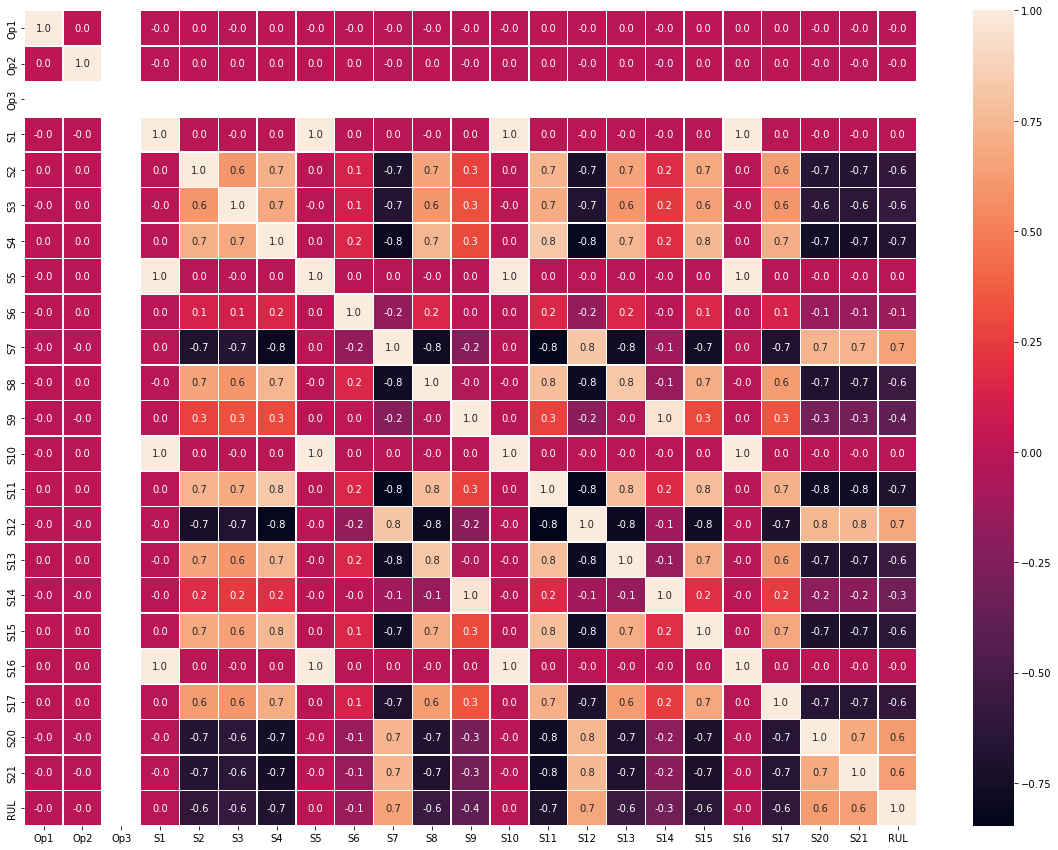

In [ ]:
f,ax = plt.subplots(figsize=(20, 15))
sns.heatmap(corr, annot=True, linewidths=.5, fmt= '.1f',ax=ax)

**5. Veri Görselleştirme**


1.   Her bir özelliğe ait dağılım grafiğini RUL'a bağlı çizdiriyoruz.
2.   Her bir özelliğe ait dağılım grafiğini OP1 ve OP2'ye göre çizdiriyoruz.



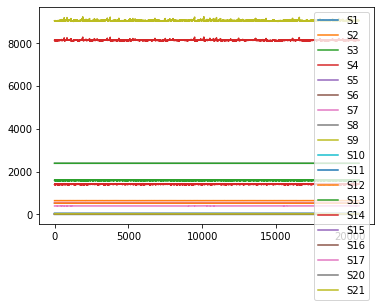

In [ ]:
df[sensor_columns].plot()

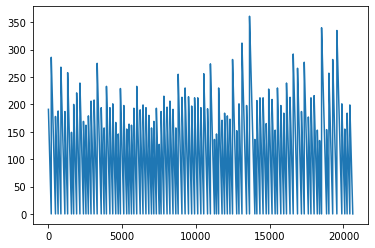

In [ ]:
df[target].plot()

RUL'a bağlı özelliklerin dağılım grafiklerini görüyoruz.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1209: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


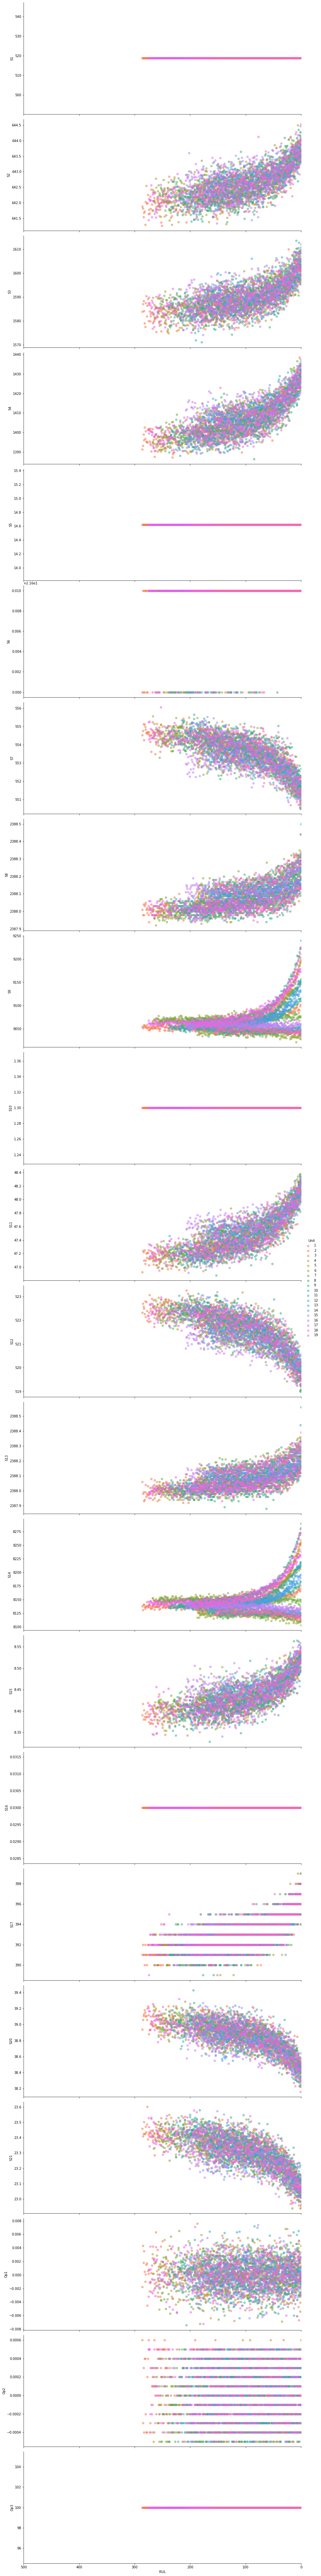

In [ ]:
explore = sns.PairGrid(data=df.query('Unit < 20') ,
                 x_vars=target,
                 y_vars=sensor_columns + op_columns,
                 hue="Unit", size=5, aspect=2.5)
explore = explore.map(plt.scatter, alpha=0.5)
explore = explore.set(xlim=(500,0))
explore = explore.add_legend()

In [ ]:
drop_sensors = ["S1", "S5", "S6", "S10", "S16"]

Yukarıdaki grafiği incelediğimizde **S1,S5,S6,S10,S16,OP3** özelliklerinin modelleme yapmak için birşey ifade etmediğini görüyoruz. O yüzden bu özellikleri de veri setimizden çıkartabiliriz.

In [ ]:
df.drop(drop_sensors, axis=1, inplace=True)

In [ ]:
df.drop(['Op3'], axis=1, inplace=True)

In [ ]:
for d in drop_sensors:
  if d in sensor_columns:
    sensor_columns.remove(d)

In [ ]:
print('eğitime sokacağımız özellikler', sensor_columns)

eğitime sokacağımız özellikler ['S2', 'S3', 'S4', 'S7', 'S8', 'S9', 'S11', 'S12', 'S13', 'S14', 'S15', 'S17', 'S20', 'S21']


**6. Isolation Forest Yöntemi ile Kümelemeye Bağlı Outlier ve Anomali Tespiti**

1.   RUL değeri 10'dan küçük olanları anomali kabul edip büyük olanları da normal kabul ediyoruz.
2.   Isolation Forest yöntemi ile anomali ve normal kümelerimizi oluşturuyoruz.



In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

RUL_THRESHOLD = 10

forest = IsolationForest()

X = df.drop(['RUL', 'Unit', 'Cycle'], axis=1)
y = df['RUL'] > RUL_THRESHOLD

skf = StratifiedKFold(n_splits=3)
folds = list(skf.split(X, y))
forest = IsolationForest()
ps = {"n_estimators": (55, 75, 95, 115), "contamination": np.linspace(0.03, 0.05, 15)}
search = GridSearchCV(estimator=forest, param_grid=ps, scoring='f1_micro', cv=folds)
search.fit(X, y)

In [ ]:
df_search = pd.DataFrame(search.cv_results_)
df_search[["mean_test_score", "std_test_score", "params"]].sort_values(by=["mean_test_score"], ascending=False).head()

,mean_test_score,std_test_score,params
3,0.944065,0.000494,"{'contamination': 0.03, 'n_estimators': 115}"
2,0.943968,0.000363,"{'contamination': 0.03, 'n_estimators': 95}"
6,0.943677,0.000891,"{'contamination': 0.03142857142857143, 'n_esti..."
7,0.943144,0.000428,"{'contamination': 0.03142857142857143, 'n_esti..."
11,0.943047,0.000561,"{'contamination': 0.032857142857142856, 'n_est..."


In [ ]:
est = search.best_estimator_
est.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


IsolationForest(contamination=0.03, n_estimators=115)

In [ ]:
preds = est.predict(X)

In [ ]:
print('anomali sayısı', len(np.where(preds == -1)[0]))
print('normal sayısı', len(np.where(preds == 1)[0]))

anomali sayısı 619
normal sayısı 20012


In [ ]:
anomaly_scores = est.score_samples(X.values)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
X['scores'] = anomaly_scores
X['cluster_label'] = preds
X['RUL'] = df['RUL']

In [ ]:
an_df = X[X['cluster_label'] == -1]

**Anomali oluşturan değerlerin tablosu**

In [ ]:
print(an_df.to_string())

* En büyük anomali değerine sahip satırda RUL(model tarafından bilinmiyor) değerinin 0 olduğunu görüyoruz.

In [ ]:
an_df.loc[830: 900]

,Op1,Op2,S2,S3,S4,S7,S8,S9,S11,S12,S13,S14,S15,S17,S20,S21,scores,cluster_label,RUL
835,0.0006,0.0003,643.38,1606.48,1431.78,551.71,2388.17,9164.28,47.86,520.28,2388.11,8221.61,8.4992,394,38.67,23.1181,-0.580071,-1,11
837,0.0001,-0.0002,643.58,1610.29,1425.23,551.70,2388.15,9163.18,47.95,520.33,2388.15,8228.25,8.4966,398,38.36,23.1739,-0.590223,-1,9
839,0.0007,0.0000,643.42,1603.95,1429.48,551.77,2388.12,9166.16,47.96,520.55,2388.17,8229.71,8.5069,395,38.29,23.0709,-0.588264,-1,7
840,0.0034,0.0002,644.50,1602.97,1426.55,551.60,2388.12,9175.69,48.08,520.17,2388.12,8239.91,8.5034,399,38.47,23.0511,-0.610375,-1,6
841,-0.0010,0.0003,643.44,1608.22,1426.27,552.01,2388.12,9174.67,48.04,520.07,2388.14,8242.61,8.5011,395,38.39,23.0651,-0.577802,-1,5
842,-0.0031,0.0005,643.27,1607.57,1429.22,551.91,2388.10,9184.41,48.19,520.12,2388.12,8246.77,8.5254,396,38.47,23.1180,-0.617837,-1,4
843,-0.0003,-0.0001,643.45,1608.24,1427.17,551.90,2388.13,9187.57,48.21,520.26,2388.16,8241.99,8.4873,396,38.55,23.1353,-0.573263,-1,3
844,-0.0005,0.0005,643.69,1603.04,1422.74,552.02,2388.14,9203.22,48.08,519.60,2388.12,8253.53,8.5283,396,38.49,23.0135,-0.599521,-1,2
845,0.0006,0.0001,643.48,1602.23,1434.12,551.81,2388.16,9192.89,48.15,520.12,2388.17,8251.11,8.5462,398,38.45,23.0710,-0.622192,-1,1
846,-0.0024,-0.0002,644.53,1612.11,1432.55,551.93,2388.13,9198.32,48.15,519.84,2388.16,8259.42,8.5246,398,38.44,23.1006,-0.634235,-1,0


**Anomali tespitinde öne çıkan özellikleri, özellik önem sırasına göre çizdiriyoruz.**

In [ ]:
preds

array([ 1,  1,  1, ..., -1, -1, -1])

In [ ]:
from sklearn import ensemble
an_model = ensemble.RandomForestClassifier()
an_model = ensemble.RandomForestClassifier(n_estimators = 200, max_depth = 15)
X = df[['S4', 'S11', 'S15']]
y = preds
an_model.fit(X, y)

RandomForestClassifier(max_depth=15, n_estimators=200)

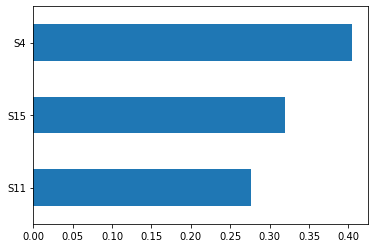

In [ ]:
import matplotlib.pyplot as plt

important_features = pd.Series(data=an_model.feature_importances_,index=X.columns)
important_features.sort_values(ascending=True,inplace=True)
important_features.plot(kind='barh')
# print(important_features.head(20))

**7. Özellik Çıkarımı ve Seçimi**


1.   Sensör değerlerinin RUL'a göre RandomForest Regresyon yöntemi ile fit edilmesi.
2.   En yüksek öneme sahip özelliklerin çıkarılması.



![alt text](https://statistics.laerd.com/spss-tutorials/img/lr/linear-nonlinear-relationships.png)

In [ ]:
drop_features_no_target = ['Unit', 'Cycle', 'Op1', 'Op2']
feature_selection_df = df.drop(drop_features_no_target, axis=1)
print(feature_selection_df.shape)

(20631, 15)


In [ ]:
## X = df[['S9', 'S8', 'S3', 'S2', 'S7', 'S6', 'S4', 'S13', 'S12', 'S11', 'S17', 'S15', 'S14', 'S20', 'S21']]
X = df[['S9', 'S8', 'S3', 'S2', 'S7', 'S4', 'S13', 'S12', 'S11', 'S17', 'S15', 'S14', 'S20', 'S21']]

y = df['RUL']

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [ ]:
from sklearn import ensemble
model = ensemble.RandomForestRegressor()
model = ensemble.RandomForestRegressor(n_estimators = 200, max_depth = 15)
model.fit(X, y)
y_pred = model.predict(X)

In [ ]:
from sklearn import ensemble
model = ensemble.ExtraTreesRegressor()
model = ensemble.ExtraTreesRegressor(n_estimators = 200, max_depth = 15)
model.fit(X, y)
y_pred = model.predict(X)

S20    0.047368
S17    0.050614
S21    0.054445
S14    0.062991
S15    0.078884
S7     0.078916
S9     0.079511
S12    0.117822
S4     0.142067
S11    0.181825
dtype: float64


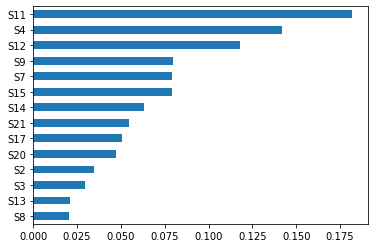

In [ ]:
import matplotlib.pyplot as plt

important_features = pd.Series(data=model.feature_importances_,index=X.columns)
important_features.sort_values(ascending=True,inplace=True)
important_features.head(20).plot(kind='barh')
print(important_features.tail(10))

**8.Sınıflandırma ve Regresyon Yöntemleriyle(ML) Tahminleme**


1.   ML Regresyon
2.   ML Sınıflandırma



Nümerik ve kategorik özellikleri belirleyip train ve test setimizi

1.   Train - %80
2.   Test - %20

olarak hazırlıyoruz.

In [ ]:
categorical = df.select_dtypes(include=['object'])
numeric = df.select_dtypes(exclude=['object'])

y = numeric['RUL'] #hedef
X = numeric.drop(['RUL'], axis = 1) #sensör değerleri

Train ve test olarak veri setimizi ikiye bölüyoruz. Veri setinin **%80'i train için %20'si** de test için ayrılıyor. Buradaki verilerin dağılımı train ve test kümesine rastgele yapılıyor.

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1339) #train ve test kümelerine verilerin rastgele dağıtımı yapılıyor.


**Random Forest Regressor**

**Grid Search** yöntemi ile modelimizin fit etmesini sağlayan en iyi parametreleri arıyoruz. En iyi parametrelere sahip modeli belirledikten sonra test verisi ile hata hesaplamalarını gerçekleştiriyoruz.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
rf = ensemble.RandomForestRegressor()
from sklearn import model_selection
cv = model_selection.KFold(5)
from sklearn.pipeline import Pipeline
pipeline = Pipeline(steps=[('standardize', preprocessing.StandardScaler())
                           , ('model', rf) ])
min_samples_leaf = [2, 10, 25, 50, 100]
max_depth = [7, 8, 9, 10, 11, 12]
from sklearn.model_selection import GridSearchCV
optimized_rf = GridSearchCV(estimator=pipeline
                            , cv=cv
                            , param_grid =dict(model__min_samples_leaf = min_samples_leaf, model__max_depth = max_depth)
                            , scoring = 'neg_mean_squared_error'
                            , verbose = 1
                            , n_jobs = -1
                           )
optimized_rf.fit(X_train, y_train)
print(optimized_rf.best_estimator_)
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_pred = optimized_rf.predict(X_test)
print("Random Forest Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("Random Forest Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
print("Random Forest r-squared: ", r2_score(y_test, y_pred))

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Pipeline(steps=[('standardize', StandardScaler()),
                ('model',
                 RandomForestRegressor(max_depth=12, min_samples_leaf=2))])
Random Forest Mean Squared Error:  336.40854731121
Random Forest Mean Absolute Error:  13.262683890578117
Random Forest r-squared:  0.9293357840040267


Test verileriyle tahmin edilen veriler arasındaki farkı scatter plot ile çizdiriyoruz.

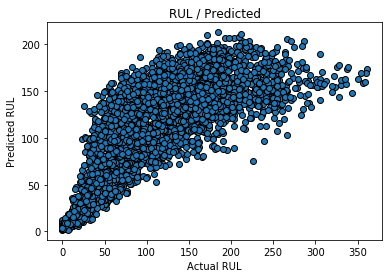

In [ ]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
# ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual RUL')
ax.set_ylabel('Predicted RUL')
ax.set_title('RUL / Predicted')
plt.show()

**Sınıflandırma(Random Forest)**

![alt text](https://thumbs.gfycat.com/RigidFantasticBlackfly-size_restricted.gif)

Çözüme yönelik yaklaşımımızı **RUL = 0** anından geriye dönük **20 satırı, 1(Bakıma ihtiyaç duyduğu aralık)**, **20 satırdan büyük olanları, 0 (normal çalışma aralığı)** olacak şekilde değiştirip verimizi sınıflandırmaya uygun hale getiriyoruz.

In [ ]:
cycles = 20
df['Target_20_Cycles'] = np.where(df['RUL'] <= cycles, 1, 0 )
df.tail(25)

In [ ]:
from sklearn import preprocessing
categorical = df.select_dtypes(include=['object'])
numeric = df.select_dtypes(exclude=['object'])
# print(categorical.columns.values)
for name, values in categorical.items():
    dummies = pd.get_dummies(values.str.strip(), prefix = name, dummy_na=True)
    numeric = pd.concat([numeric, dummies], axis=1)
for name in numeric:
    if pd.isnull(numeric[name]).sum() > 0:
        numeric["%s_mi" % (name)] = pd.isnull(numeric[name])
        median = numeric[name].median()
        numeric[name] = numeric[name].apply(lambda x: median if pd.isnull(x) else x)
y = numeric['Target_20_Cycles']
X = numeric.drop(['Target_20_Cycles', 'RUL'], axis = 1)

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)
from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier
rf = ensemble.RandomForestClassifier()

from skleairn import model_selection
cv = model_selection.KFold(5)

from sklearn.pipeline import Pipeline
pipeline = Pipeline(steps=[('standardize', preprocessing.StandardScaler())
                           , ('model', rf) ])
my_min_samples_leaf = [2, 25, 50]
my_max_depth = [8, 9, 10, 12]

from sklearn.model_selection import GridSearchCV
optimized_rf = GridSearchCV(estimator=pipeline
                            , cv=cv
                            , param_grid =dict(model__min_samples_leaf = my_min_samples_leaf, model__max_depth = my_max_depth)
                            , scoring = 'roc_auc'
                            , verbose = 1
                            , n_jobs = -1
                           )
optimized_rf.fit(X_train, y_train)

y_pred_proba = optimized_rf.predict_proba(X_test)[:, 1]
y_pred = optimized_rf.predict(X_test)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  1.4min finished


**Sınıflandırma Sonuçlarının Değerlendirilmesi**

Confusion Matrix:
[[3677   59]
 [  59  332]]
Random Forest Accuracy: 97.1%
Random Forest Precision: 84.9%
Random Forest Recall: 84.9%
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3736
           1       0.85      0.85      0.85       391

    accuracy                           0.97      4127
   macro avg       0.92      0.92      0.92      4127
weighted avg       0.97      0.97      0.97      4127



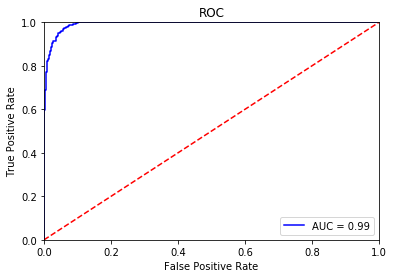

In [ ]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, confusion_matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
from sklearn.metrics import classification_report
print("Random Forest Accuracy: "+"{:.1%}".format(accuracy_score(y_test, y_pred)));
print("Random Forest Precision: "+"{:.1%}".format(precision_score(y_test, y_pred)));
print("Random Forest Recall: "+"{:.1%}".format(recall_score(y_test, y_pred)));
print("Classification Report:")
print(classification_report(y_test, y_pred))
from sklearn import metrics
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_proba)
roc_auc = metrics.auc(fpr, tpr)
import matplotlib.pyplot as plt
plt.title('ROC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

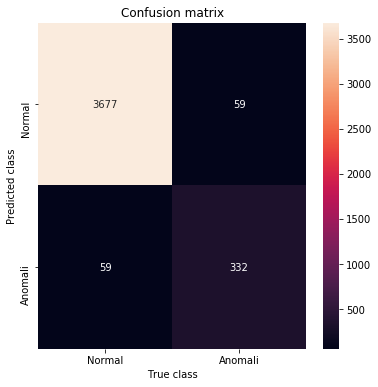

In [ ]:
conf_matrix = confusion_matrix(y_test,  y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, xticklabels=['Normal', 'Anomali'], yticklabels=['Normal', 'Anomali'], annot=True, fmt="d")
plt.title("Confusion matrix")
plt.ylabel('Predicted class')
plt.xlabel('True class')
plt.show()

336 + 55  = *391* anomalinin 55'ini **normal** olarak yanlış geri kalanını **anomali** olarak doğru tahmin etmiş

3677 + 59 = 3736 normal değerin 59'unu **anomali** olarak yanlış geri kalanını **normal** olarak doğru tahmin etmiş



**Sınıflandırmaya bağlı özellik önemlerinin belirlenmesi**

In [ ]:
rf_model = optimized_rf.best_estimator_.named_steps['model']
importances = rf_model.feature_importances_
importances = pd.Series(data=importances,index=X.columns)
importances.sort_values(ascending=True,inplace=True)
importances.head(20).plot(kind='barh')
print(importances.tail(10))

Sınıflandırmayı etkileyen en önemli özellikler yukarıda görülmektedir. Regresyon yönteminden farklı olarak burada **S4** en önemli özellik olarak görünüyor.